<a href="https://colab.research.google.com/github/merve215/dogecoin-sentiment-analysis/blob/main/2_2)doge_analysis_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Make sure : MyDrive -> Big_Data_Project
!ls /content/drive/MyDrive/Big_Data_Project

Mounted at /content/drive
'0) Converitng to Excels.py'		      Lexicon
'1) SubReddits Filtered.ipynb'		      Output
'2-1) doge_anaylsis_part1.py'		      Price_Data
'2-2)doge_analysis_part2.ipynb'		      Python_SubReddit_Data
 AC2.ipynb				      reddit2
'Analyzing Returns to Doge, BTC, S&P.ipynb'   SubReddits
'Big Data Project.gdoc'			     'Word Cloud.ipynb copy'
'Crypto SubReddit Analysis .ipynb'


In [ ]:
!ls /content/drive/MyDrive/Big_Data_Project
!ls /content/drive/MyDrive/Big_Data_Project/Output

'0) Converitng to Excels.py'		      Lexicon
'1) SubReddits Filtered.ipynb'		      Output
'2-1) doge_anaylsis_part1.py'		      Price_Data
'2-2)doge_analysis_part2.ipynb'		      Python_SubReddit_Data
 AC2.ipynb				      reddit2
'Analyzing Returns to Doge, BTC, S&P.ipynb'   SubReddits
'Big Data Project.gdoc'			     'Word Cloud.ipynb copy'
'Crypto SubReddit Analysis .ipynb'
 crypto_doge_related_posts.csv		       'normlaized.investing_sentiment_vs_price change.png'
 crypto_FinBERT_Sentiment_Results.csv	        perf_doge_related_posts.csv
 crypto_Merged_Sentiment_Results.csv	        pf_FinBERT_Sentiment_Results.csv
 crypto_Merged_Sentiment_Results_Daily.csv      pf_Merged_Sentiment_Results_With_Lexicon.csv
 dogecoin_posts.csv			        seconddoge_analysis_results.csv
 entiredoge_sentiment_results_daily.csv         seconddoge_Merged_Sentiment_Results.csv
 firstdoge_analysis_results.csv		        seconddoge_Merged_Sentiment_Results_Daily.csv
 firstdoge_Merged_Sentiment_Results.csv         stock

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm import tqdm  # For progress bar

# Data for Doge Part 1

In [ ]:
file_path = '/content/drive/MyDrive/Big_Data_Project/Output/dogecoin_posts.csv'
df = pd.read_csv(file_path, header=None)
print(df)


          0           1                                                  2  \
0         0           1                                                  2   
1         0  2020-01-01  happy new year shibes let's make some good stu...   
2         0  2020-01-01            please donate to help prevent suicides!   
3         3  2020-01-01                       happy 2020! to the moon!! 🐶🚀   
4       301  2020-01-01  just checked the price after coming in from my...   
...     ...         ...                                                ...   
992070    0  2021-12-31                       sometimes i like paying tax.   
992071   12  2021-12-31                              resurfacing yet again   
992072   20  2021-12-31  from halo game page on fb, thought you guys wo...   
992073   43  2021-12-31                 elon’s new profile pic… thoughts??   
992074   23  2021-12-31                                    working for us!   

                       3                                       

In [ ]:
# Load the file
file_path = '/content/drive/MyDrive/Big_Data_Project/Output/firstdoge_analysis_results.csv'
df = pd.read_csv(file_path, header=None)
results_df = pd.read_csv(file_path)



<ipython-input-12-2c0b7ab06a8f>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None)


In [ ]:
# Load additional sentiment lexicon
additional_sentiments_file = '/content/drive/MyDrive/Big_Data_Project/Lexicon/l2_lexicon.csv'
additional_df = pd.read_csv(additional_sentiments_file, header=None, names=['key word', 'sentiment'])  # Specify header=None and names

# Create a dictionary for fast lookup
lexicon_dict = dict(zip(additional_df['key word'], additional_df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': -1}))) # 0: neutral, 1: positive, -1: negative

In [ ]:
# Apply lexicon-based overrides
def override_with_lexicon(text, finbert_sentiment):
    # Check for matches with lexicon phrases
    for phrase, custom_sentiment in lexicon_dict.items():
        if phrase in text:  # Phrase match found
            return custom_sentiment  # Override sentiment
    return finbert_sentiment  # Use FinBERT sentiment if no match is found

# Apply the lexicon override
# Change 'finbert_results_df' to 'results_df'
results_df['final_sentiment'] = results_df.apply(
    lambda row: override_with_lexicon(row['text'], row['finbert_sentiment']),
    axis=1
)

In [ ]:
# Save final results
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/firstdoge_Merged_Sentiment_Results.csv'
results_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to /content/drive/MyDrive/Big_Data_Project/Output/firstdoge_Merged_Sentiment_Results.csv


Find average daily sentiment - doge SubReddit part1

In [ ]:
import pandas as pd

# Load the final sentiment results
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/firstdoge_Merged_Sentiment_Results.csv'
results_df = pd.read_csv(output_file)

# Convert the 'date' column to datetime objects
results_df['date'] = pd.to_datetime(results_df['date'], errors='coerce')

# Group by date and calculate the average sentiment for each day
average_daily_sentiment = results_df.groupby('date')['final_sentiment'].mean()

# Print or further process the average daily sentiment
average_daily_sentiment

,final_sentiment
date,
2021-01-01,0.085106
2021-01-02,0.005775
2021-01-03,0.056944
2021-01-04,0.039666
2021-01-05,0.052448
...,...
2021-04-26,0.035469
2021-04-27,0.037194
2021-04-28,0.035657


In [ ]:
# Define the output file path
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/firstdoge_Merged_Sentiment_Results_Daily.csv'

# Save the average daily sentiment to a CSV file
average_daily_sentiment.to_csv(output_file, header=True)

print(f"Average daily sentiment saved to: {output_file}")

Average daily sentiment saved to: /content/drive/MyDrive/Big_Data_Project/Output/firstdoge_Merged_Sentiment_Results_Daily.csv


# Data for Doge Part 2

In [ ]:
# Load additional sentiment lexicon
additional_sentiments_file = '/content/drive/MyDrive/Big_Data_Project/Lexicon/l2_lexicon.csv'
additional_df = pd.read_csv(additional_sentiments_file, header=None, names=['key word', 'sentiment'])  # Specify header=None and names

# Create a dictionary for fast lookup
lexicon_dict = dict(zip(additional_df['key word'], additional_df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': -1}))) # 0: neutral, 1: positive, -1: negative

In [ ]:
# Apply lexicon-based overrides
def override_with_lexicon(text, finbert_sentiment):
    # Check if 'text' is a string before checking for phrases
    if isinstance(text, str):
        # Check for matches with lexicon phrases
        for phrase, custom_sentiment in lexicon_dict.items():
            if phrase in text:  # Phrase match found
                return custom_sentiment  # Override sentiment
    return finbert_sentiment  # Use FinBERT sentiment if no match is found

# Apply the lexicon override
# Change 'finbert_results_df' to 'results_df'
results_df['final_sentiment'] = results_df.apply(
    lambda row: override_with_lexicon(row['text'], row['finbert_sentiment']),
    axis=1
)

In [ ]:
# Save final results
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/seconddoge_Merged_Sentiment_Results.csv'
results_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to /content/drive/MyDrive/Big_Data_Project/Output/seconddoge_Merged_Sentiment_Results.csv


Find average daily sentiment - doge SubReddit part2

In [ ]:
import pandas as pd

# Load the final sentiment results
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/seconddoge_Merged_Sentiment_Results.csv'
results_df = pd.read_csv(output_file)

# Convert the 'date' column to datetime objects
results_df['date'] = pd.to_datetime(results_df['date'], errors='coerce')

# Group by date and calculate the average sentiment for each day
average_daily_sentiment = results_df.groupby('date')['final_sentiment'].mean()

# Print or further process the average daily sentiment
average_daily_sentiment

,final_sentiment
date,
2021-05-01,0.050472
2021-05-02,0.034936
2021-05-03,0.047002
2021-05-04,0.044108
2021-05-05,0.054880
...,...
2021-12-27,0.039216
2021-12-28,0.015625
2021-12-29,0.045139


In [ ]:
# Define the output file path
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/seconddoge_Merged_Sentiment_Results_Daily.csv'

# Save the average daily sentiment to a CSV file
average_daily_sentiment.to_csv(output_file, header=True)

print(f"Average daily sentiment saved to: {output_file}")

Average daily sentiment saved to: /content/drive/MyDrive/Big_Data_Project/Output/seconddoge_Merged_Sentiment_Results_Daily.csv


# Merge doge part 1 and part 2 sentiment analysis daily results

In [ ]:
# Define the file paths
file1 = '/content/drive/MyDrive/Big_Data_Project/Output/firstdoge_Merged_Sentiment_Results_Daily.csv'
file2 = '/content/drive/MyDrive/Big_Data_Project/Output/seconddoge_Merged_Sentiment_Results_Daily.csv'




In [ ]:
# Read the files into dataframes
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [ ]:
# Option 1: Simple Concatenation (Row-wise)
average_daily_sentiment_df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
# Save the merged dataframe
output_file = '/content/drive/MyDrive/Big_Data_Project/Output/entiredoge_sentiment_results_daily.csv'
average_daily_sentiment_df.to_csv(output_file, index=False)

In [ ]:
# Check the first 5 rows
print("First 5 rows:")
print(average_daily_sentiment_df.head())


First 5 rows:
         date  final_sentiment
0  2021-01-01         0.085106
1  2021-01-02         0.005775
2  2021-01-03         0.056944
3  2021-01-04         0.039666
4  2021-01-05         0.052448


In [ ]:
# Check the last 5 rows
print("\nLast 5 rows:")
print(average_daily_sentiment_df.tail())


Last 5 rows:
           date  final_sentiment
360  2021-12-27         0.039216
361  2021-12-28         0.015625
362  2021-12-29         0.045139
363  2021-12-30         0.049834
364  2021-12-31        -0.111111


In [ ]:
file_path='/content/drive/MyDrive/Big_Data_Project/Output/dogecoin_posts.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
print(df)

          0           1                                                  2  \
0         0  2020-01-01  happy new year shibes let's make some good stu...   
1         0  2020-01-01            please donate to help prevent suicides!   
2         3  2020-01-01                       happy 2020! to the moon!! 🐶🚀   
3       301  2020-01-01  just checked the price after coming in from my...   
4         3  2020-01-01                      happy new year! to the moon!!   
...     ...         ...                                                ...   
992069    0  2021-12-31                       sometimes i like paying tax.   
992070   12  2021-12-31                              resurfacing yet again   
992071   20  2021-12-31  from halo game page on fb, thought you guys wo...   
992072   43  2021-12-31                 elon’s new profile pic… thoughts??   
992073   23  2021-12-31                                    working for us!   

                       3                                       

In [ ]:
df['Date'] = pd.to_datetime(df['1'])

In [ ]:
start_date = '2021-01-01'
end_date = '2021-12-31'


In [ ]:
filtered_df = df[(df['1'] >= start_date) & (df['1'] <= end_date)]

In [ ]:
print(filtered_df)

         0           1                                                  2  \
9709    24  2021-01-01          doge looking to break 0.005000 short term   
9710     6  2021-01-01                           new year tipping thread!   
9711    15  2021-01-01                          the doge side of the moon   
9712     6  2021-01-01       how long does it take to sync from bootstrap   
9713     1  2021-01-01  wasted my time making a meme website about dog...   
...     ..         ...                                                ...   
992069   0  2021-12-31                       sometimes i like paying tax.   
992070  12  2021-12-31                              resurfacing yet again   
992071  20  2021-12-31  from halo game page on fb, thought you guys wo...   
992072  43  2021-12-31                 elon’s new profile pic… thoughts??   
992073  23  2021-12-31                                    working for us!   

                      3                                                  4 

In [ ]:
file_path = "/content/drive/MyDrive/Big_Data_Project/Output/crypto_doge_related_posts.csv"
df = pd.read_csv(file_path)

In [ ]:
df['Date'] = pd.to_datetime(df['1'])

In [ ]:
start_date = '2021-01-01'
end_date = '2021-12-31'


In [ ]:
filtered_df = df[(df['1'] >= start_date) & (df['1'] <= end_date)]

In [ ]:
print(filtered_df)

                1                                                  2  \
425    2021-01-01                                           buy doge   
426    2021-01-01  dogecoin, nyancoin, garlicoin, who else believ...   
427    2021-01-01                                             doge??   
428    2021-01-01                                           buy doge   
429    2021-01-02                                           dogecoin   
...           ...                                                ...   
26525  2021-12-30  how does it feel to lose the life-changing gai...   
26526  2021-12-30  which coins did perform better than your expec...   
26527  2021-12-30                 crypto was #1 reddit topic of 2021   
26528  2021-12-30                          dogecoin triangle pattern   
26529  2021-12-31  did anyone get any crypto-related gifts for ch...   

                                                       5       Date  
425                                            [removed] 2021-01-

# Doge Price File Modification

In [ ]:
#File path
price_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/doge_price_filtered_2021.csv'

In [ ]:
data = pd.read_csv(price_file)

In [ ]:
# datime format
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

In [ ]:
# Calculating Returns using Price column
data['Returns'] = data['Price'].pct_change()

In [ ]:
print(data.head())

          Date     Price      Open      High       Low     Vol. Change %  \
364 2021-01-01  0.005661  0.004666  0.005676  0.004606    8.41B   21.33%   
363 2021-01-02  0.010489  0.005667  0.014008  0.005553  100.85B   85.27%   
362 2021-01-03  0.009850  0.010493  0.013928  0.009381   71.68B   -6.09%   
361 2021-01-04  0.009780  0.009845  0.011493  0.007623   38.72B   -0.71%   
360 2021-01-05  0.009958  0.009784  0.010319  0.008866   15.37B    1.82%   

           date   Returns  
364  2021-01-01       NaN  
363  2021-01-02  0.852853  
362  2021-01-03 -0.060921  
361  2021-01-04 -0.007107  
360  2021-01-05  0.018200  


In [ ]:
output_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/returns_doge_price_filtered_2021.csv'
data.to_csv(output_file, index=False)
print(f"returns columns included saved: {output_file}")

returns columns included saved: /content/drive/MyDrive/Big_Data_Project/Price_Data/returns_doge_price_filtered_2021.csv


# Pearson Correlation Coefficient

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
# Load the sentiment data
sentiment_file = '/content/drive/MyDrive/Big_Data_Project/Output/entiredoge_sentiment_results_daily.csv'
sentiment_df = pd.read_csv(sentiment_file)

In [ ]:
# Load the price data
price_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/returns_doge_price_filtered_2021.csv'
price_df = pd.read_csv(price_file)

In [ ]:
# Ensure 'date' is in datetime format for both datasets
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
price_df['date'] = pd.to_datetime(price_df['Date'])

In [ ]:
# Define the desired start and end dates
start_date = pd.to_datetime('2021-01-01')  # Example start date
end_date = pd.to_datetime('2021-12-31')    # Example end date


In [ ]:
sentiment_df = sentiment_df[(sentiment_df['date'] >= start_date) & (sentiment_df['date'] <= end_date)]
price_df = price_df[(price_df['date'] >= start_date) & (price_df['date'] <= end_date)]

In [ ]:
# Merge the datasets on the 'date' column
merged_df = pd.merge(sentiment_df, price_df, on='date')

In [ ]:
# Check the merged data
print(merged_df.head())

        date  final_sentiment        Date     Price      Open      High  \
0 2021-01-01         0.085106  2021-01-01  0.005661  0.004666  0.005676   
1 2021-01-02         0.005775  2021-01-02  0.010489  0.005667  0.014008   
2 2021-01-03         0.056944  2021-01-03  0.009850  0.010493  0.013928   
3 2021-01-04         0.039666  2021-01-04  0.009780  0.009845  0.011493   
4 2021-01-05         0.052448  2021-01-05  0.009958  0.009784  0.010319   

        Low     Vol. Change %   Returns  
0  0.004606    8.41B   21.33%       NaN  
1  0.005553  100.85B   85.27%  0.852853  
2  0.009381   71.68B   -6.09% -0.060921  
3  0.007623   38.72B   -0.71% -0.007107  
4  0.008866   15.37B    1.82%  0.018200  


In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
# Replace infinite values with NaN
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values in the relevant columns
merged_df.dropna(subset=['final_sentiment', 'Returns'], inplace=True)

# Now, recalculate the Pearson correlation
correlation, p_value = pearsonr(merged_df['final_sentiment'], merged_df['Returns'])
print(f"Pearson Correlation (Sentiment vs Returns): {correlation}")
print(f"p-value: {p_value}")

Pearson Correlation (Sentiment vs Returns): 0.09600874941442632
p-value: 0.06730100284654995


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
merged_df['normalized_sentiment'] = scaler.fit_transform(merged_df[['final_sentiment']])
merged_df['normalized_returns'] = scaler.fit_transform(merged_df[['Returns']])

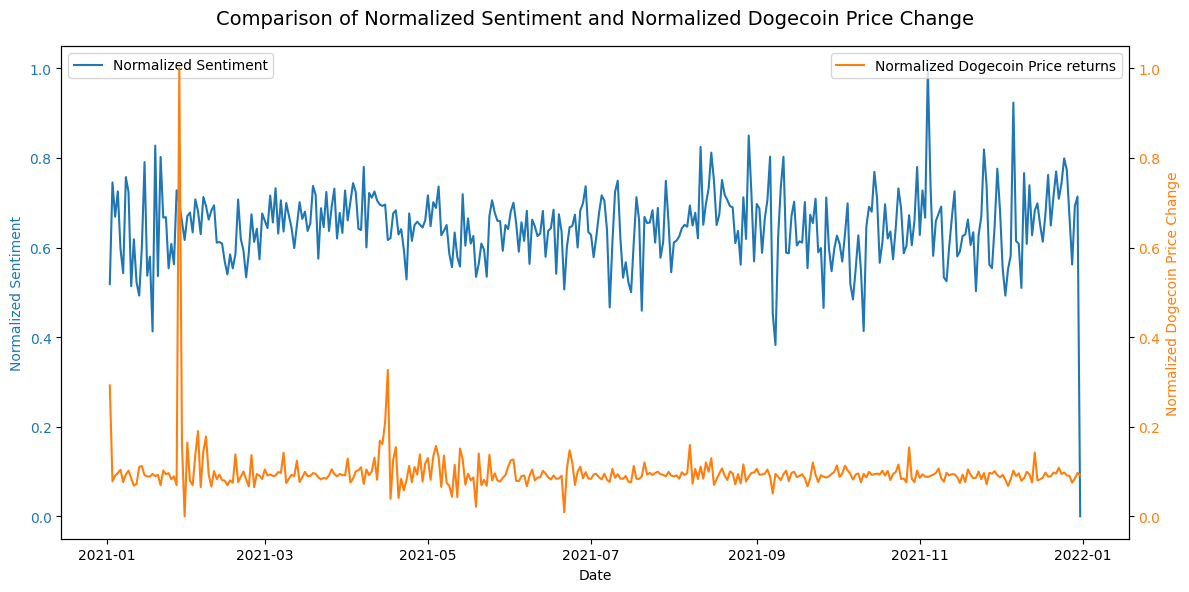

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment', color='tab:blue')
ax1.plot(merged_df['date'], merged_df['normalized_sentiment'], label='Normalized Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Normalized Dogecoin Price Change', color='tab:orange')
ax2.plot(merged_df['date'], merged_df['normalized_returns'], label='Normalized Dogecoin Price returns', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle('Comparison of Normalized Sentiment and Normalized Dogecoin Price Change', fontsize=14)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


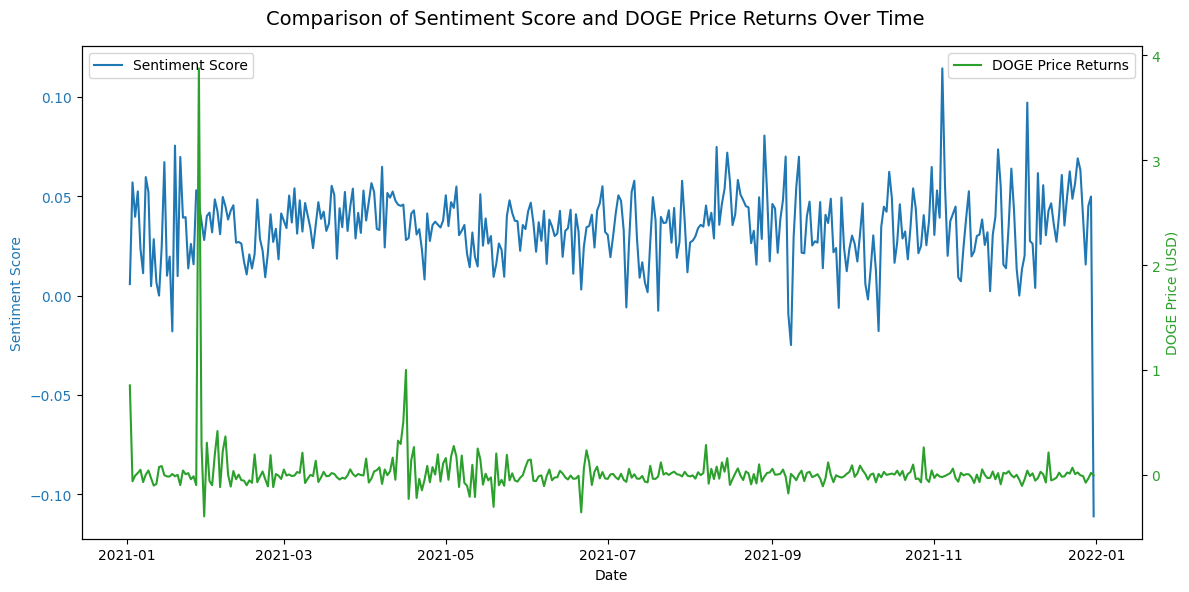

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with one plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for Sentiment Score
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color='tab:blue')
ax1.plot(merged_df['date'], merged_df['final_sentiment'], label='Sentiment Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for DOGE Price
ax2 = ax1.twinx()
ax2.set_ylabel('DOGE Price (USD)', color='tab:green')
ax2.plot(merged_df['date'], merged_df['Returns'], label='DOGE Price Returns', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add titles and legends
fig.suptitle('Comparison of Sentiment Score and DOGE Price Returns Over Time', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlap
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


# Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
btc_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/btc_price.csv'



In [ ]:
btc_data = pd.read_csv(btc_file)



In [ ]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])


In [ ]:
btc_data = btc_data[(btc_data['Date'] >= '2021-01-01') & (btc_data['Date'] <= '2021-12-31')]


In [ ]:
btc_data['Price'] = pd.to_numeric(btc_data['Price'].str.replace(',', '').str.replace('$', ''), errors='coerce')
btc_data['Return_btc'] = btc_data['Price'].pct_change()


In [ ]:
# eliminating NaN
btc_data = btc_data.dropna()


In [ ]:
print(btc_data)

           Date    Price      Open      High       Low    Vol. Change %  \
1076 2021-12-30  47156.0  46,465.0  47,911.0  45,996.0   3.20K    1.49%   
1077 2021-12-29  46465.0  47,554.0  48,166.0  46,129.0   4.12K   -2.29%   
1078 2021-12-28  47554.0  50,684.0  50,710.0  47,339.0   5.43K   -6.18%   
1079 2021-12-27  50684.0  50,797.0  52,027.0  50,483.0   3.52K   -0.22%   
1080 2021-12-26  50797.0  50,435.2  51,281.0  49,473.0   2.90K    0.71%   
...         ...      ...       ...       ...       ...     ...      ...   
1435 2021-01-05  33996.0  32,020.0  33,996.0  30,979.1  14.48K    6.17%   
1436 2021-01-04  32020.0  32,971.0  33,403.0  29,178.0  24.68K   -2.88%   
1437 2021-01-03  32971.0  32,183.0  34,253.0  32,110.0  18.91K    2.44%   
1438 2021-01-02  32185.0  29,346.0  33,168.0  29,192.0  22.01K    9.67%   
1439 2021-01-01  29346.0  28,933.0  29,498.0  28,932.0   8.33K    1.43%   

      Return_btc  
1076    0.020295  
1077   -0.014653  
1078    0.023437  
1079    0.065820  
1080

In [ ]:
doge_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/returns_doge_price_filtered_2021.csv'

In [ ]:
# Ensure 'Date' is in datetime format for both datasets
doge_df = pd.read_csv(doge_file)  # Load the dogecoin data into a DataFrame
doge_df['Date'] = pd.to_datetime(doge_df['Date'])  # Convert 'Date' to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])  # Convert 'Date' to datetime

# Now, perform the merge
btc_merged_df = pd.merge(merged_df, btc_data, on='Date')

In [ ]:
print(btc_merged_df)

          date  final_sentiment       Date   Price_x    Open_x    High_x  \
0   2021-01-02         0.005775 2021-01-02  0.010489  0.005667  0.014008   
1   2021-01-03         0.056944 2021-01-03  0.009850  0.010493  0.013928   
2   2021-01-04         0.039666 2021-01-04  0.009780  0.009845  0.011493   
3   2021-01-05         0.052448 2021-01-05  0.009958  0.009784  0.010319   
4   2021-01-06         0.023490 2021-01-06  0.010443  0.009960  0.010968   
..         ...              ...        ...       ...       ...       ...   
358 2021-12-26         0.063218 2021-12-26  0.189756  0.190581  0.192471   
359 2021-12-27         0.039216 2021-12-27  0.187748  0.189775  0.192787   
360 2021-12-28         0.015625 2021-12-28  0.173805  0.187786  0.187915   
361 2021-12-29         0.045139 2021-12-29  0.167849  0.173814  0.177313   
362 2021-12-30         0.049834 2021-12-30  0.171028  0.167867  0.175694   

        Low_x   Vol._x Change %_x   Returns  normalized_sentiment  \
0    0.005553  100

In [ ]:
btc_merged_df.rename(columns={'final_sentiment': 'doge_sentiment_score'}, inplace=True)

In [ ]:
spy_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/spy_price.csv'

In [ ]:
spy_data = pd.read_csv(spy_file)

In [ ]:
spy_data['Date'] = pd.to_datetime(spy_data['Date'])

In [ ]:
print("date frame:", spy_data['Date'].min(), "to", spy_data['Date'].max())


date frame: 2021-01-04 00:00:00 to 2021-12-31 00:00:00


In [ ]:
spy_data = spy_data[(spy_data['Date'] >= '2021-01-01') & (spy_data['Date'] <= '2021-12-31')]

In [ ]:
print(spy_data)

          Date     Price      Open      High       Low Vol. Change %
739 2021-12-31  4,766.20  4,775.20  4,786.80  4,765.80  NaN   -0.26%
740 2021-12-30  4,778.70  4,794.20  4,808.90  4,775.30  NaN   -0.30%
741 2021-12-29  4,793.10  4,788.60  4,804.10  4,778.10  NaN    0.14%
742 2021-12-28  4,786.40  4,795.50  4,807.00  4,780.00  NaN   -0.10%
743 2021-12-27  4,791.20  4,734.00  4,791.50  4,734.00  NaN    1.38%
..         ...       ...       ...       ...       ...  ...      ...
986 2021-01-08  3,824.70  3,815.10  3,826.70  3,783.60  NaN    0.55%
987 2021-01-07  3,803.80  3,764.70  3,811.60  3,764.70  NaN    1.49%
988 2021-01-06  3,748.10  3,712.20  3,783.00  3,705.30  NaN    0.57%
989 2021-01-05  3,726.90  3,698.00  3,737.80  3,695.10  NaN    0.71%
990 2021-01-04  3,700.70  3,764.60  3,770.00  3,662.70  NaN   -1.47%

[252 rows x 7 columns]


In [ ]:
spy_data['Price'] = pd.to_numeric(spy_data['Price'].str.replace(',', '').str.replace('$', ''), errors='coerce')
spy_data['Return_spy'] = spy_data['Price'].pct_change()

In [ ]:
print(spy_data)

          Date   Price      Open      High       Low Vol. Change %  Return_spy
739 2021-12-31  4766.2  4,775.20  4,786.80  4,765.80  NaN   -0.26%         NaN
740 2021-12-30  4778.7  4,794.20  4,808.90  4,775.30  NaN   -0.30%    0.002623
741 2021-12-29  4793.1  4,788.60  4,804.10  4,778.10  NaN    0.14%    0.003013
742 2021-12-28  4786.4  4,795.50  4,807.00  4,780.00  NaN   -0.10%   -0.001398
743 2021-12-27  4791.2  4,734.00  4,791.50  4,734.00  NaN    1.38%    0.001003
..         ...     ...       ...       ...       ...  ...      ...         ...
986 2021-01-08  3824.7  3,815.10  3,826.70  3,783.60  NaN    0.55%    0.006606
987 2021-01-07  3803.8  3,764.70  3,811.60  3,764.70  NaN    1.49%   -0.005464
988 2021-01-06  3748.1  3,712.20  3,783.00  3,705.30  NaN    0.57%   -0.014643
989 2021-01-05  3726.9  3,698.00  3,737.80  3,695.10  NaN    0.71%   -0.005656
990 2021-01-04  3700.7  3,764.60  3,770.00  3,662.70  NaN   -1.47%   -0.007030

[252 rows x 8 columns]


In [ ]:
# Ensure 'Date' is in datetime format for both datasets
btc_merged_df['Date'] = pd.to_datetime(btc_merged_df['Date'])  # Convert 'Date' in merged_df to datetime
spy_data['Date'] = pd.to_datetime(spy_data['Date'])  # Convert 'Date' in btc_data to datetime

# Now, perform the merge
btcspy_merged_df = pd.merge(btc_merged_df, spy_data, on='Date')

In [ ]:
print(btcspy_merged_df)

          date  doge_sentiment_score       Date   Price_x    Open_x    High_x  \
0   2021-01-06              0.023490 2021-01-06  0.010443  0.009960  0.010968   
1   2021-01-07              0.011278 2021-01-07  0.009724  0.010443  0.010497   
2   2021-01-08              0.059633 2021-01-08  0.009753  0.009728  0.010253   
3   2021-01-11              0.028369 2021-01-11  0.008828  0.009829  0.009846   
4   2021-01-12              0.006667 2021-01-12  0.008066  0.008824  0.009136   
..         ...                   ...        ...       ...       ...       ...   
244 2021-12-23              0.048711 2021-12-23  0.184817  0.173029  0.184817   
245 2021-12-27              0.039216 2021-12-27  0.187748  0.189775  0.192787   
246 2021-12-28              0.015625 2021-12-28  0.173805  0.187786  0.187915   
247 2021-12-29              0.045139 2021-12-29  0.167849  0.173814  0.177313   
248 2021-12-30              0.049834 2021-12-30  0.171028  0.167867  0.175694   

        Low_x   Vol._x Chan

In [ ]:
btcspy_merged_df.shape

(251, 27)

In [ ]:
# sort by date
btc_merged_df['date'] = pd.to_datetime(btc_merged_df['date'])
btc_merged_df.sort_values('date', inplace=True)

# Lagged Features
btc_merged_df['lagged_return_1'] = btc_merged_df['Returns'].shift(1)
btc_merged_df['lagged_return_2'] = btc_merged_df['Returns'].shift(2)
btc_merged_df['lagged_sentiment'] = btc_merged_df['doge_sentiment_score'].shift(1)


# eliminating NaN
btc_merged_df = btc_merged_df.dropna()

# defining Y and Xs
y = btc_merged_df['Returns']  # Dependent variable
X = btc_merged_df[["doge_sentiment_score", 'lagged_sentiment', 'lagged_return_1','lagged_return_2','Return_btc']]  # Independent variables

# cons.
X = sm.add_constant(X)

# OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.634
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.150
Time:                        23:32:13   Log-Likelihood:                 19.857
No. Observations:                 359   AIC:                            -27.71
Df Residuals:                     353   BIC:                            -4.415
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0518 

In [ ]:
# lagged return
btcspy_merged_df['lagged_sentiment'] = btcspy_merged_df['doge_sentiment_score'].shift(1)
btcspy_merged_df['lagged_return_1'] = btcspy_merged_df['Returns'].shift(1)
btcspy_merged_df['lagged_return_2'] = btcspy_merged_df['Returns'].shift(2)

#dropping NA
btcspy_merged_df = btcspy_merged_df.dropna(subset=['lagged_sentiment', 'lagged_return_1', 'lagged_return_2'])

#regress
y = btcspy_merged_df['Returns']
X = btcspy_merged_df[["doge_sentiment_score", 'lagged_sentiment', 'lagged_return_1',
                      'lagged_return_2', 'Return_btc', 'Return_spy']]

# consonants
X = sm.add_constant(X)

# OLS model
model = sm.OLS(y, X)
results = model.fit()


print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.043
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0608
Time:                        23:33:10   Log-Likelihood:                -23.871
No. Observations:                 245   AIC:                             61.74
Df Residuals:                     238   BIC:                             86.25
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0669 

In [ ]:
cryotp_file= '/content/drive/MyDrive/Big_Data_Project/Output/crypto_Merged_Sentiment_Results_Daily.csv'



In [ ]:
crypto_data = pd.read_csv(cryotp_file)

In [ ]:
print(crypto_data)

     Unnamed: 0        date  final_sentiment
0             0  2020-01-03         0.000000
1             1  2020-01-04         0.000000
2             2  2020-01-05         0.000000
3             3  2020-01-10         0.000000
4             4  2020-01-14         0.000000
..          ...         ...              ...
530         530  2021-12-27         0.114286
531         531  2021-12-28        -0.032258
532         532  2021-12-29         0.111111
533         533  2021-12-30         0.080000
534         534  2021-12-31         0.000000

[535 rows x 3 columns]


In [ ]:
# Ensure 'Date' is in datetime format for both datasets
btcspy_merged_df['Date'] = pd.to_datetime(btcspy_merged_df['Date'])  # Convert 'Date' in merged_df to datetime
crypto_data['date'] = pd.to_datetime(crypto_data['date'])  # Convert 'Date' in btc_data to datetime

# Now, perform the merge
everything_merged_df = pd.merge(btcspy_merged_df, crypto_data, on='date')

In [ ]:
print(everything_merged_df)

          date  doge_sentiment_score       Date   Price_x    Open_x    High_x  \
0   2021-01-06              0.023490 2021-01-06  0.010443  0.009960  0.010968   
1   2021-01-07              0.011278 2021-01-07  0.009724  0.010443  0.010497   
2   2021-01-08              0.059633 2021-01-08  0.009753  0.009728  0.010253   
3   2021-01-11              0.028369 2021-01-11  0.008828  0.009829  0.009846   
4   2021-01-12              0.006667 2021-01-12  0.008066  0.008824  0.009136   
..         ...                   ...        ...       ...       ...       ...   
244 2021-12-23              0.048711 2021-12-23  0.184817  0.173029  0.184817   
245 2021-12-27              0.039216 2021-12-27  0.187748  0.189775  0.192787   
246 2021-12-28              0.015625 2021-12-28  0.173805  0.187786  0.187915   
247 2021-12-29              0.045139 2021-12-29  0.167849  0.173814  0.177313   
248 2021-12-30              0.049834 2021-12-30  0.171028  0.167867  0.175694   

        Low_x   Vol._x Chan

In [ ]:
everything_merged_df.rename(columns={'final_sentiment': 'crypto_sentiment_score'}, inplace=True)

In [ ]:
#regress
y = everything_merged_df['Returns']
X = everything_merged_df[["doge_sentiment_score",'crypto_sentiment_score', 'lagged_sentiment', 'lagged_return_1',
                      'lagged_return_2', 'Return_btc', 'Return_spy']]

# consonants
X = sm.add_constant(X)

# OLS model
model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.746
Date:                Sat, 21 Dec 2024   Prob (F-statistic):             0.0991
Time:                        01:22:58   Log-Likelihood:                -22.520
No. Observations:                 249   AIC:                             61.04
Df Residuals:                     241   BIC:                             89.18
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
#regress
y = everything_merged_df['Returns']
X = everything_merged_df[['crypto_sentiment_score', 'lagged_return_1',
                      'lagged_return_2', 'Return_btc']]

# consonants
X = sm.add_constant(X)

# OLS model
model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5142
Date:                Sat, 21 Dec 2024   Prob (F-statistic):              0.725
Time:                        01:32:35   Log-Likelihood:                -27.633
No. Observations:                 249   AIC:                             65.27
Df Residuals:                     244   BIC:                             82.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#regress
y = everything_merged_df['Returns']
X = everything_merged_df[['crypto_sentiment_score','lagged_return_1',
                      'lagged_return_2', 'Return_btc', 'Return_spy']]

# consonants
X = sm.add_constant(X)

# OLS model
model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.620
Date:                Sat, 21 Dec 2024   Prob (F-statistic):              0.155
Time:                        01:32:46   Log-Likelihood:                -24.597
No. Observations:                 249   AIC:                             61.19
Df Residuals:                     243   BIC:                             82.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0